# **Pós-Graduação**

## Projeto: MoveHub Cities 

Predict the ranking position of a city in the list of the top-k best cities to live 

### Data Science Cycle:

##### First Step - Data Gathering
Get the data : 
Where are the data? 
Want?
Are there privacy issues?
How were the data sampled?
Tools→database systems, python, pandas
##### Second Step - Data Processing
Enrich the data:
Should you transform the data? Are there missing or duplicated data? Should you reduce data dimensionality? Are there data in multiple (wrong) formats? Skills→data cleaning and ﬁltering, information extraction;Tools→SQL, xquery, nltk, spacy, coreNL
    DATA WRANGLING: Data Scientist spends
##### Third Step - Data Exploration
Explore the data:
How could you plot the data? Are there patterns? Are there outliers? Are there anomalies? Skills→get to know data, develop hypotheses, patterns? anomalies? Tools→matplotlib, numpy, scipy, pandas, mrjob 
##### Fourth Step- Data Modeling
Model the Data: 
What model should you build? What features should you select? How could you ﬁt the model? How will you validate the model? Skills→regression, machine learning, validation, big data I Tools→scikits learn, pandas, mrjob, spark, hadoop, mapreduce
##### Fifth Step - Evaluate Model
##### Sixth Step - Data Visualization
Communicate the Data:
I What did you learn? I Do the results make sense? I Could you tell a history? I Skills→presentation, speaking, visuals, writing I Tools→matplotlib, adobe illustrator, latex, powerpoint, keynote


In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

cities.csv
movehubcostofliving.csv
movehubqualityoflife.csv



In [41]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from pandas import DataFrame
import matplotlib.pyplot as plt
import pylab as plt
import scipy as scipy
from scipy.stats.stats import pearsonr
# Pretty display for notebooks
%matplotlib inline

# Load the dataset
full_data = pd.read_csv('../input/cities.csv') 
full_data2= pd.read_csv('../input/movehubqualityoflife.csv')
full_data3= pd.read_csv('../input/movehubcostofliving.csv')

# Print the first few entries of the MoveHub data
display(full_data.head())
display(full_data2.head())
display(full_data3.head())

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


In [42]:
#Verify if there is missing values inside every column of the dataset: "cities.csv"
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
City       3543 non-null object
Country    3540 non-null object
dtypes: object(2)
memory usage: 55.4+ KB


In [43]:
#See countries that have NAN missing
full_data[full_data['Country'].isnull()]

,City,Country
654,Sevastopol,NaN
724,Simferopol,NaN
1529,Priština,NaN


In [44]:
#Insertion of the countries that are missing
full_data.iloc[654,1]='Ukraine'
full_data.iloc[724,1]='Russia'
full_data.iloc[1529,1]='Kosovo'

#See that now, there isn't any more NAN:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 2 columns):
City       3543 non-null object
Country    3543 non-null object
dtypes: object(2)
memory usage: 55.4+ KB


In [45]:
#Verify if there is missing values inside every column of the dataset:'movehubcostofliving.csv'
full_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
City               216 non-null object
Movehub Rating     216 non-null float64
Purchase Power     216 non-null float64
Health Care        216 non-null float64
Pollution          216 non-null float64
Quality of Life    216 non-null float64
Crime Rating       216 non-null float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB


In [46]:
#Verify if there is missing values inside every column of the dataset:'movehubqualityoflife.csv'
full_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
City                     216 non-null object
Cappuccino               216 non-null float64
Cinema                   216 non-null float64
Wine                     216 non-null float64
Gasoline                 216 non-null float64
Avg Rent                 216 non-null float64
Avg Disposable Income    216 non-null float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB


In [47]:
#Merge Datasets
movehubcity= pd.merge(full_data2, full_data3,how='outer')
#Sort Dataset by 'City'
movehubcity=movehubcity.sort_values(by='City')
#Modification of the values of the index
movehubcity.reset_index(drop=True)

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Aachen,81.64,60.55,73.25,11.69,90.52,15.34,2.05,6.88,4.26,1.33,767.23,1619.72
1,Aberdeen,81.89,49.70,82.86,34.31,76.77,24.22,1.99,6.98,5.98,1.37,1195.74,1743.78
2,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86,2.67,6.23,13.73,0.30,1779.93,2135.92
3,Addis Ababa,59.88,6.38,63.89,85.59,28.41,26.04,0.46,2.29,4.18,0.72,653.77,124.22
4,Adelaide,87.29,72.03,56.25,12.01,91.54,41.32,2.49,11.42,10.08,0.95,1382.26,2911.69
5,Ahmedabad,76.16,33.69,61.67,68.21,57.01,18.18,0.72,2.11,4.22,0.85,193.08,301.69
6,Alicante,82.83,44.69,75.61,28.19,72.53,44.01,1.28,6.01,4.03,1.19,511.49,852.48
7,Amman,74.40,21.22,75.37,61.63,39.57,46.74,2.55,6.54,12.79,0.83,460.92,441.94
8,Amsterdam,84.00,47.18,68.06,53.42,72.85,29.76,2.09,8.52,4.26,1.45,1513.16,1747.59
9,Antalya,71.91,22.91,59.55,30.55,40.51,44.53,1.81,3.26,5.44,1.62,217.45,362.42


In [48]:
#Insert column country to dataset.
movehubcity2= pd.merge(movehubcity, full_data,how='left',on='City')
movehubcity2

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country
0,Aachen,81.64,60.55,73.25,11.69,90.52,15.34,2.05,6.88,4.26,1.33,767.23,1619.72,Germany
1,Aberdeen,81.89,49.70,82.86,34.31,76.77,24.22,1.99,6.98,5.98,1.37,1195.74,1743.78,United Kingdom
2,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86,2.67,6.23,13.73,0.30,1779.93,2135.92,United Arab Emirates
3,Addis Ababa,59.88,6.38,63.89,85.59,28.41,26.04,0.46,2.29,4.18,0.72,653.77,124.22,Ethiopia
4,Adelaide,87.29,72.03,56.25,12.01,91.54,41.32,2.49,11.42,10.08,0.95,1382.26,2911.69,Australia
5,Ahmedabad,76.16,33.69,61.67,68.21,57.01,18.18,0.72,2.11,4.22,0.85,193.08,301.69,India
6,Alicante,82.83,44.69,75.61,28.19,72.53,44.01,1.28,6.01,4.03,1.19,511.49,852.48,Spain
7,Amman,74.40,21.22,75.37,61.63,39.57,46.74,2.55,6.54,12.79,0.83,460.92,441.94,Jordan
8,Amsterdam,84.00,47.18,68.06,53.42,72.85,29.76,2.09,8.52,4.26,1.45,1513.16,1747.59,Netherlands
9,Antalya,71.91,22.91,59.55,30.55,40.51,44.53,1.81,3.26,5.44,1.62,217.45,362.42,Turkey


In [49]:
#Missing Values: 30 cities don't have countries.
movehubcity2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 14 columns):
City                     228 non-null object
Movehub Rating           228 non-null float64
Purchase Power           228 non-null float64
Health Care              228 non-null float64
Pollution                228 non-null float64
Quality of Life          228 non-null float64
Crime Rating             228 non-null float64
Cappuccino               228 non-null float64
Cinema                   228 non-null float64
Wine                     228 non-null float64
Gasoline                 228 non-null float64
Avg Rent                 228 non-null float64
Avg Disposable Income    228 non-null float64
Country                  198 non-null object
dtypes: float64(12), object(2)
memory usage: 26.7+ KB


In [50]:
#All the cities that don't have country
movehubcity2[movehubcity2['Country'].isnull()]

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country
10,Asheville,83.17,70.51,79.02,30.55,81.34,30.21,1.80,5.88,7.85,0.64,1225.82,1898.54,NaN
51,Cebu,66.93,12.90,73.70,35.90,41.21,46.88,1.43,2.85,3.48,0.88,475.01,200.28,NaN
61,Cordoba,73.76,27.56,75.24,48.76,47.68,51.56,1.95,3.92,4.25,0.93,524.80,523.02,NaN
66,Davao,69.29,17.63,69.00,77.98,30.66,17.71,0.79,1.90,3.17,0.84,554.18,158.34,NaN
74,Dusseldorf,83.45,72.52,75.98,8.61,88.02,15.34,2.13,8.31,4.47,1.28,1193.48,2301.70,NaN
79,Frankfurt,82.75,62.60,65.33,14.54,88.04,27.55,2.13,7.67,4.07,1.36,1022.98,1875.46,NaN
81,Galway,83.19,58.59,52.97,52.47,77.85,40.78,2.13,7.67,6.39,1.39,852.48,1875.46,NaN
100,Istanbul,80.22,34.42,80.38,44.98,45.67,42.36,1.99,5.44,9.06,1.66,634.23,724.84,NaN
101,Izmir,76.07,32.12,57.33,30.55,42.90,25.91,1.81,4.71,7.25,1.69,543.63,590.57,NaN
122,Lodz,73.32,26.37,53.21,37.21,46.29,64.51,1.45,4.77,4.15,1.18,337.35,415.20,NaN


In [51]:
#Update wrong names of the cities
movehubcity2.iloc[227,0]='Zürich'
movehubcity2.iloc[224,0]='Washington, D.C.'
movehubcity2.iloc[201,0]='Tampa, Florida'
movehubcity2.iloc[188,0]='São Paulo'
movehubcity2.iloc[185,0]='San Francisco, California'
movehubcity2.iloc[184,0]='San Diego, California'
movehubcity2.iloc[193,13]='Malta'
movehubcity2.iloc[10,13]='United States' #dado não encontrado no wikipedia
movehubcity2.iloc[51,13]='Philippines'#dado não encontrado no wikipedia
movehubcity2.iloc[61,13]='Argentina' #dado não encontrado no wikipedia
movehubcity2.iloc[66,0]='Davao City'
movehubcity2.iloc[74,0]='Düsseldorf'
movehubcity2.iloc[79,0]='Frankfurt am Main'
movehubcity2.iloc[81,13]='Ireland' #dado não encontrado no wikipedia
movehubcity2.iloc[100,0]='İstanbul'
movehubcity2.iloc[101,0]='İzmir'
movehubcity2.iloc[122,13]='Poland' #dado não encontrado no wikipedia
movehubcity2.iloc[129,0]='Málaga'
movehubcity2.iloc[130,0]='Malmö'
movehubcity2.iloc[134,13]='Spain'
movehubcity2.iloc[136,0]='Medellín'
movehubcity2.iloc[139,0]='Miami, Florida'
movehubcity2.iloc[141,0]='Minneapolis, Minnesota'
movehubcity2.iloc[164,13]='Thailand'
movehubcity2.iloc[166,0]='Philadelphia, Pennsylvania'
movehubcity2.iloc[167,0]='Phoenix, Arizona'
movehubcity2.iloc[168,0]='Portland, Oregon'
movehubcity2.iloc[176,0]='Rio de Janeiro'
movehubcity2.iloc[178,13]='United States'
movehubcity2.iloc[183,0]='San Antonio, Texas'

In [52]:
movehubcity2[movehubcity2['Country'].isnull()]

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country
66,Davao City,69.29,17.63,69.00,77.98,30.66,17.71,0.79,1.90,3.17,0.84,554.18,158.34,NaN
74,Düsseldorf,83.45,72.52,75.98,8.61,88.02,15.34,2.13,8.31,4.47,1.28,1193.48,2301.70,NaN
79,Frankfurt am Main,82.75,62.60,65.33,14.54,88.04,27.55,2.13,7.67,4.07,1.36,1022.98,1875.46,NaN
100,İstanbul,80.22,34.42,80.38,44.98,45.67,42.36,1.99,5.44,9.06,1.66,634.23,724.84,NaN
101,İzmir,76.07,32.12,57.33,30.55,42.90,25.91,1.81,4.71,7.25,1.69,543.63,590.57,NaN
129,Málaga,84.30,45.77,69.17,30.55,67.90,9.11,1.28,7.03,2.98,1.21,575.43,968.42,NaN
130,Malmö,81.37,52.56,87.96,83.45,60.32,33.97,2.90,10.01,8.51,1.40,1101.38,1802.26,NaN
136,Medellín,70.14,19.20,85.88,37.27,39.70,46.02,1.31,3.38,7.48,0.78,261.51,310.54,NaN
139,"Miami, Florida",84.43,57.79,64.44,22.45,74.77,64.85,2.62,6.54,9.81,0.65,1961.31,2052.83,NaN
141,"Minneapolis, Minnesota",83.47,69.91,62.35,77.94,83.79,40.36,2.62,6.54,9.81,0.64,980.65,2295.38,NaN


In [53]:
movehubcity2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 14 columns):
City                     228 non-null object
Movehub Rating           228 non-null float64
Purchase Power           228 non-null float64
Health Care              228 non-null float64
Pollution                228 non-null float64
Quality of Life          228 non-null float64
Crime Rating             228 non-null float64
Cappuccino               228 non-null float64
Cinema                   228 non-null float64
Wine                     228 non-null float64
Gasoline                 228 non-null float64
Avg Rent                 228 non-null float64
Avg Disposable Income    228 non-null float64
Country                  207 non-null object
dtypes: float64(12), object(2)
memory usage: 26.7+ KB


In [54]:
#Do merge again to recover the names of the countries with the names of the cities already updated.
data= pd.merge(movehubcity2, full_data,how='inner',on='City')
data

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country_x,Country_y
0,Aachen,81.64,60.55,73.25,11.69,90.52,15.34,2.05,6.88,4.26,1.33,767.23,1619.72,Germany,Germany
1,Aberdeen,81.89,49.70,82.86,34.31,76.77,24.22,1.99,6.98,5.98,1.37,1195.74,1743.78,United Kingdom,United Kingdom
2,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86,2.67,6.23,13.73,0.30,1779.93,2135.92,United Arab Emirates,United Arab Emirates
3,Addis Ababa,59.88,6.38,63.89,85.59,28.41,26.04,0.46,2.29,4.18,0.72,653.77,124.22,Ethiopia,Ethiopia
4,Adelaide,87.29,72.03,56.25,12.01,91.54,41.32,2.49,11.42,10.08,0.95,1382.26,2911.69,Australia,Australia
5,Ahmedabad,76.16,33.69,61.67,68.21,57.01,18.18,0.72,2.11,4.22,0.85,193.08,301.69,India,India
6,Alicante,82.83,44.69,75.61,28.19,72.53,44.01,1.28,6.01,4.03,1.19,511.49,852.48,Spain,Spain
7,Amman,74.40,21.22,75.37,61.63,39.57,46.74,2.55,6.54,12.79,0.83,460.92,441.94,Jordan,Jordan
8,Amsterdam,84.00,47.18,68.06,53.42,72.85,29.76,2.09,8.52,4.26,1.45,1513.16,1747.59,Netherlands,Netherlands
9,Antalya,71.91,22.91,59.55,30.55,40.51,44.53,1.81,3.26,5.44,1.62,217.45,362.42,Turkey,Turkey


In [55]:
#Delete column 'Country_x' and alter the name of 'Country_y'
data=data.drop('Country_x',axis=1)
data=data.rename(columns={'Country_y': 'Country'})
#See there isn't any NAN countries
data[data['Country'].isnull()]

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country


In [56]:
#Here we see that are four register for the City London, and this happen for others cities, too.
#We don't know the correct country for each city, so we'll maintain one register for each different 
#country
###### Duplicated register - Remotion
data[(data['City'] == 'London')]

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country
136,London,100.0,53.17,69.53,57.95,47.89,50.14,2.49,11.26,6.98,1.4,2590.76,1992.89,United Kingdom
137,London,100.0,53.17,69.53,57.95,47.89,50.14,2.49,11.26,6.98,1.4,2590.76,1992.89,Canada
138,London,100.0,53.17,69.53,57.95,47.89,50.14,2.49,11.26,6.98,1.4,2590.76,1992.89,United Kingdom
139,London,100.0,53.17,69.53,57.95,47.89,50.14,2.49,11.26,6.98,1.4,2590.76,1992.89,Canada


In [57]:
#This code shows all the cities that are duplicated.
data.set_index('City').index.get_duplicates()

['Athens',
 'Barcelona',
 'Birmingham',
 'Cambridge',
 'Colombo',
 'Hamilton',
 'Hyderabad',
 'London',
 'Valencia',
 'Vancouver']

In [58]:
#This code shows the amount of duplicated registers:
names=data.City.value_counts()
names[names > 1]

Cambridge     9
Valencia      9
Birmingham    4
London        4
Barcelona     4
Hamilton      4
Athens        4
Vancouver     4
Hyderabad     4
Colombo       4
Name: City, dtype: int64

In [59]:
###### Example city London: Remove the duplicated registers:
df2=pd.DataFrame(data[(data['City'] == 'London')])
df2
df2.drop_duplicates(subset=['City','Country'])

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Country
136,London,100.0,53.17,69.53,57.95,47.89,50.14,2.49,11.26,6.98,1.4,2590.76,1992.89,United Kingdom
137,London,100.0,53.17,69.53,57.95,47.89,50.14,2.49,11.26,6.98,1.4,2590.76,1992.89,Canada


In [60]:
#Like in the example above, we're gonna to delete all the duplicated registers for all the cities:
data=data.drop_duplicates(subset=['City','Country'])

In [61]:
#You can run this code to see there isn't any more duplicated city:
#This code will remove 28 duplicated cities.
names=data.City.value_counts()
names[names > 1]

Cambridge     3
Valencia      3
Birmingham    2
London        2
Barcelona     2
Hamilton      2
Athens        2
Vancouver     2
Hyderabad     2
Colombo       2
Name: City, dtype: int64

In [62]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 246
Data columns (total 14 columns):
City                     219 non-null object
Movehub Rating           219 non-null float64
Purchase Power           219 non-null float64
Health Care              219 non-null float64
Pollution                219 non-null float64
Quality of Life          219 non-null float64
Crime Rating             219 non-null float64
Cappuccino               219 non-null float64
Cinema                   219 non-null float64
Wine                     219 non-null float64
Gasoline                 219 non-null float64
Avg Rent                 219 non-null float64
Avg Disposable Income    219 non-null float64
Country                  219 non-null object
dtypes: float64(12), object(2)
memory usage: 25.7+ KB


In [63]:
#Replace '' by '_'
data.columns = data.columns.str.replace(' ','_')

In [64]:
data

,City,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,Cappuccino,Cinema,Wine,Gasoline,Avg_Rent,Avg_Disposable_Income,Country
0,Aachen,81.64,60.55,73.25,11.69,90.52,15.34,2.05,6.88,4.26,1.33,767.23,1619.72,Germany
1,Aberdeen,81.89,49.70,82.86,34.31,76.77,24.22,1.99,6.98,5.98,1.37,1195.74,1743.78,United Kingdom
2,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86,2.67,6.23,13.73,0.30,1779.93,2135.92,United Arab Emirates
3,Addis Ababa,59.88,6.38,63.89,85.59,28.41,26.04,0.46,2.29,4.18,0.72,653.77,124.22,Ethiopia
4,Adelaide,87.29,72.03,56.25,12.01,91.54,41.32,2.49,11.42,10.08,0.95,1382.26,2911.69,Australia
5,Ahmedabad,76.16,33.69,61.67,68.21,57.01,18.18,0.72,2.11,4.22,0.85,193.08,301.69,India
6,Alicante,82.83,44.69,75.61,28.19,72.53,44.01,1.28,6.01,4.03,1.19,511.49,852.48,Spain
7,Amman,74.40,21.22,75.37,61.63,39.57,46.74,2.55,6.54,12.79,0.83,460.92,441.94,Jordan
8,Amsterdam,84.00,47.18,68.06,53.42,72.85,29.76,2.09,8.52,4.26,1.45,1513.16,1747.59,Netherlands
9,Antalya,71.91,22.91,59.55,30.55,40.51,44.53,1.81,3.26,5.44,1.62,217.45,362.42,Turkey


## Data Exploration

In [65]:
#See the other notebook "Data Exploration"
#Drop outliers:
data=data.drop([79]) #Purchase_Power
data=data.drop([105]) #Avg_Rent
data=data.drop([190]) #Cinema
data=data.drop([213]) #Wine
data=data.drop(246) #Avg_Disposable_Income
data=data.drop(128) #Avg_Disposable_Income

****Data Modeling - Multivariate Regression***

In [66]:
#Importação 'train_test_split'
from sklearn.model_selection import train_test_split

X = data.drop(['Movehub_Rating','Country','City'], axis = 1) 
y=data['Movehub_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print ("Dados de Treinamento e dados de teste divididos.")

Dados de Treinamento e dados de teste divididos.


In [67]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
y_saida=reg.predict(X_test)

In [69]:
#Metrics for avaliation
#Explained variance regression score function
#Best possible score is 1.0, lower values are worse.

from sklearn.metrics import explained_variance_score
explained_variance_score=explained_variance_score(y_test, y_saida)  

In [70]:
from sklearn.metrics import mean_squared_error
mean_squared_error=mean_squared_error(y_test, y_saida)

In [71]:
from sklearn.metrics import mean_absolute_error
erro_medio_absoluto=mean_absolute_error(y_test, y_saida)

In [72]:
print ("Determination coefficient r²: {:.3f}".format(reg.score(X_train,y_train)))
print ("Determination coefficient r² of the testing set: {:.3f} ".format(reg.score(X_test,y_test)))
print("mean_squared_error: {:.2f} ".format(mean_squared_error))
print("mean_absolute_error: {:.2f} ".format(erro_medio_absoluto))
print("Explained_variance_score: {:.3f} ".format(explained_variance_score))
print ('Linear Coefficient {:.2f}'.format(reg.intercept_))
print ('Angular Coefficient{:}'.format(reg.coef_))

Determination coefficient r²: 0.752
Determination coefficient r² of the testing set: 0.902 
mean_squared_error: 3.59 
mean_absolute_error: 1.62 
Explained_variance_score: 0.917 
Linear Coefficient 57.98
Angular Coefficient[  2.98304395e-01   1.46177746e-02   8.05693549e-03   1.10607315e-02
   2.60359235e-02  -1.25224781e+00   2.68690968e-01   1.71591517e-01
   3.63710540e+00   4.20868210e-03  -2.50362735e-03]


In [73]:
#Results:
pd.DataFrame(list(zip(y_test[5:10],y_saida[5:10])),columns=['True Values','Estimated Values'])

,True Values,Estimated Values
0,82.75,84.069923
1,69.15,71.258506
2,77.13,74.925120
3,76.16,74.127597
4,84.66,87.442396


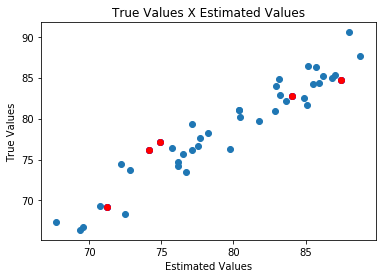

In [74]:
plt.scatter(y_saida,y_test)
plt.scatter(y_saida[5:10],y_test[5:10],color='b')
plt.scatter(y_saida[5:10],y_test[5:10],color='r')
plt.xlabel('Estimated Values')
plt.ylabel('True Values')
plt.title('True Values X Estimated Values')

plt.show()